In [78]:
import pandas as pd
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt

from scipy.stats import ttest_rel
from itertools import combinations
import statsmodels.stats.multitest as smm
from scipy.stats import f_oneway


In [2]:
# Assume the notebook is in the project root or a subfolder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mimic_emb_path = os.path.abspath(os.path.join(os.getcwd(), "..", "MIMIC_CXR_EMB"))

sys.path.append(project_root)
sys.path.append(mimic_emb_path)

from MIMIC_CXR_EMB.config_MIMIC import get_diseases, get_diseases_abbr

In [3]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [4]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [5]:
seed_19_sex = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.602116,0.101199,0.397884,-0.101199
1,Cardiomegaly,0.519209,-0.018417,0.480791,0.018417
2,Lung Opacity,0.548594,0.073993,0.451406,-0.073993
3,Lung Lesion,0.506591,-0.030421,0.493409,0.030421
4,Edema,0.526316,-0.023003,0.473684,0.023003


In [6]:
seed_19_age = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.414815,-0.003347,0.376720,-0.063597,0.132275,0.003347,0,NaN,0.009524,0.286902
1,Cardiomegaly,0.425494,0.072766,0.337888,-0.000362,0.118630,0.000362,0,NaN,0.006430,-0.312850
2,Lung Opacity,0.404177,0.093894,0.360497,0.032062,0.122577,-0.032062,0,NaN,0.007644,-0.090883
3,Lung Lesion,0.423729,0.004051,0.383239,-0.004051,0.116761,-0.123870,0,NaN,0.012241,0.139778
4,Edema,0.443243,0.021395,0.321195,0.045649,0.097297,-0.021395,0,NaN,0.001422,-0.338939


In [7]:
seed_19_race = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,diseases,%White,Gap_White,%Black,Gap_Black,%Hisp,Gap_Hisp,%Other,Gap_Other,%Asian,Gap_Asian,%American,Gap_American
0,Enlarged Cardiomediastinum,0.584127,0.018449,0.103704,0.000000,0.053968,-0.059024,0.034921,-0.073284,0.016931,0.119898,0.000000,NaN
1,Cardiomegaly,0.529497,-0.058740,0.168462,0.001131,0.048063,-0.001131,0.037775,0.016573,0.020736,-0.133485,0.002733,0.069890
2,Lung Opacity,0.543407,0.058435,0.120530,-0.011449,0.046274,0.008665,0.029621,0.075628,0.022932,-0.008665,0.001502,-0.171544


In [8]:
seed_19_insurance = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_insurance.csv",index_col=0)
seed_31_insurance = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_insurance.csv",index_col=0)
seed_38_insurance = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_insurance.csv",index_col=0)
seed_47_insurance = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_insurance.csv",index_col=0)
seed_77_insurance = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_insurance.csv",index_col=0)
seed_77_insurance.head(3)

,diseases,%Medicare,Gap_Medicare,%Other,Gap_Other,%Medicaid,Gap_Medicaid
0,Enlarged Cardiomediastinum,0.342857,0.000000,0.424339,-0.017118,0.074074,0.030335
1,Cardiomegaly,0.413599,0.017690,0.350908,0.000000,0.075711,-0.007854
2,Lung Opacity,0.400491,0.033577,0.328146,0.000000,0.075212,-0.042310


In [9]:
diseases=get_diseases()

diseases = [disease for disease in diseases if disease != 'No Finding']

diseases_abbr =get_diseases_abbr()


## 1. Gender

In [10]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)

In [11]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [12]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [13]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [14]:
for disease in diseases:
  
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [15]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
4,Edema,Edema,0.011027,0.526316,0.005514,0.016244,0.473684,-0.005514,0.016244
1,Cardiomegaly,Cardiomegaly,0.019428,0.519209,-0.009714,0.011605,0.480791,0.009714,0.011605
8,Pneumothorax,Pneumothorax,0.024070,0.630014,0.012035,0.012804,0.369986,-0.012035,0.012804
9,Pleural Effusion,Effusion,0.029189,0.524734,-0.014594,0.005913,0.475266,0.014594,0.005913
5,Consolidation,Consolidation,0.055735,0.557354,0.027868,0.016741,0.442646,-0.027868,0.016741
7,Atelectasis,Atelectasis,0.065195,0.560872,0.033042,0.005957,0.438802,-0.032153,0.005964
10,Pleural Other,Pleural Other,0.067368,0.625000,0.033684,0.023230,0.375000,-0.033684,0.023230
2,Lung Opacity,Air. Opacity,0.075138,0.548594,0.037569,0.020548,0.451406,-0.037569,0.020548
6,Pneumonia,Pneumonia,0.087817,0.536498,0.043909,0.010926,0.463502,-0.043909,0.010926
3,Lung Lesion,Lung Lesion,0.097997,0.506591,-0.048998,0.014591,0.493409,0.048998,0.014591


In [17]:
sex_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%M', 'Gap_M_mean', 'CI_M',
       '%F', 'Gap_F_mean', 'CI_F'],
      dtype='object')

In [18]:

# Extract just the Gap columns in the right order
gap_cols = ['Gap_M_mean', 'Gap_F_mean']

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = sex_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


Gap_M_mean vs Gap_F_mean: t=2.5229, p=0.0268, corrected_p=0.0268, significant=True


In [19]:
sex_tpr_disp_df.to_csv("./TPR_GAPS/sex_tpr_disp.csv")

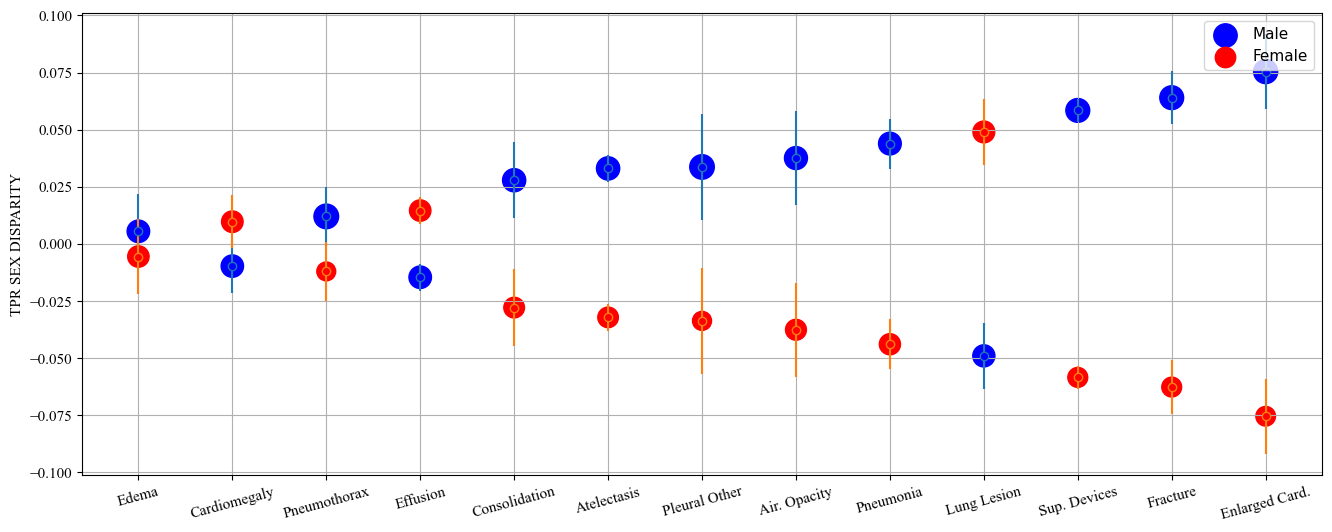

In [20]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_SEX.pdf")


## 2. Age

In [21]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [22]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [23]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [24]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [25]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [26]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [27]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [28]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [29]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [30]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [31]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv("./TPR_GAPS/age_tpr_disp.csv")

In [40]:

# Extract just the Gap columns in the right order
gap_cols = [
    'Gap_0-20_mean', 'Gap_20-40_mean', 'Gap_40-60_mean','Gap_60-80_mean']

ci_cols = ['CI_0-20', 'CI_20-40', 'CI_40-60','CI_60-80']

gap_df = age_tpr_disp_df[gap_cols]

# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


#  ANOVA
groups = [gap_df[col] for col in gap_cols]
anova_result = f_oneway(*groups)

anova_result.pvalue, anova_result.statistic

print(f"ANOVA result: F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f} significant={anova_result.pvalue < 0.05}")


Gap_0-20_mean vs Gap_20-40_mean: t=-1.4345, p=0.1792, corrected_p=1.0000, significant=False
Gap_0-20_mean vs Gap_40-60_mean: t=-1.2370, p=0.2418, corrected_p=1.0000, significant=False
Gap_0-20_mean vs Gap_60-80_mean: t=-1.5478, p=0.1499, corrected_p=0.8996, significant=False
Gap_20-40_mean vs Gap_40-60_mean: t=-0.5767, p=0.5748, corrected_p=1.0000, significant=False
Gap_20-40_mean vs Gap_60-80_mean: t=-1.1864, p=0.2584, corrected_p=1.0000, significant=False
Gap_40-60_mean vs Gap_60-80_mean: t=-1.5569, p=0.1455, corrected_p=0.8728, significant=False
ANOVA result: F-statistic = nan, p-value = nan significant=False


In [80]:
age_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%40-60', 'Gap_40-60_mean',
       'CI_40-60', '%60-80', 'Gap_60-80_mean', 'CI_60-80', '%20-40',
       'Gap_20-40_mean', 'CI_20-40', '%80-', 'Gap_80-_mean', 'CI_80-', '%0-20',
       'Gap_0-20_mean', 'CI_0-20'],
      dtype='object')

In [84]:

# Load your data
df = age_tpr_disp_df

# Define the columns to use
gap_cols = [
    'Gap_0-20_mean',
    'Gap_20-40_mean',
    'Gap_40-60_mean',
    'Gap_60-80_mean',
]

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_0_20 = gap_df['Gap_0-20_mean'].tolist()
group_20_40 = gap_df['Gap_20-40_mean'].tolist()
group_40_60 = gap_df['Gap_40-60_mean'].tolist()
group_60_80 = gap_df['Gap_60-80_mean'].tolist()
# group_80 = gap_df['Gap_80-_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_0_20, group_20_40, group_40_60, group_60_80)


print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 2.080, p-value = 0.117 significant=False


In [35]:
plt.rcParams.update({'font.size': font_size})

In [36]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_AGE.pdf")

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

Error in callback <function _draw_all_if_interactive at 0x000001B1891E1BD0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1600x600 with 1 Axes>

## 3. Race

In [44]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [45]:
result_race_grouped_stat

%White                                              \
                            count      mean           std       min       25%   
diseases                                                                        
Atelectasis                   5.0  0.545736  0.000000e+00  0.545736  0.545736   
Cardiomegaly                  5.0  0.529497  0.000000e+00  0.529497  0.529497   
Consolidation                 5.0  0.578466  0.000000e+00  0.578466  0.578466   
Edema                         5.0  0.614225  0.000000e+00  0.614225  0.614225   
Enlarged Cardiomediastinum    5.0  0.584127  0.000000e+00  0.584127  0.584127   
Fracture                      5.0  0.490476  0.000000e+00  0.490476  0.490476   
Lung Lesion                   5.0  0.452919  0.000000e+00  0.452919  0.452919   
Lung Opacity                  5.0  0.543407  0.000000e+00  0.543407  0.543407   
No Finding                    5.0  0.369470  0.000000e+00  0.369470  0.369470   
Pleural Effusion              5.0  0.604667  0.000000e+00  0.604667  0.604667   
Pleural Other                 5.0  0.671053  0.000000e+00  0.671053  0.671053   
Pneumonia                     5.0  0.493418  0.000000e+00  0.493418  0.493418   
Pneumothorax                  5.0  0.447441  6.206335e-17  0.447441  0.447441   
Support Devices               5.0  0.551733  0.000000e+00  0.551733  0.551733   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.545736  0.545736  0.545736       5.0  0.007113   
Cardiomegaly                0.529497  0.529497  0.529497       5.0 -0.050629   
Consolidation               0.578466  0.578466  0.578466       5.0  0.015624   
Edema                       0.614225  0.614225  0.614225       5.0 -0.009075   
Enlarged Cardiomediastinum  0.584127  0.584127  0.584127       5.0  0.004655   
Fracture                    0.490476  0.490476  0.490476       5.0  0.078995   
Lung Lesion                 0.452919  0.452919  0.452919       5.0 -0.003346   
Lung Opacity                0.543407  0.543407  0.543407       5.0  0.050304   
No Finding                  0.369470  0.369470  0.369470       5.0 -0.067553   
Pleural Effusion            0.604667  0.604667  0.604667       5.0  0.062474   
Pleural Other               0.671053  0.671053  0.671053       5.0  0.084314   
Pneumonia                   0.493418  0.493418  0.493418       5.0  0.012293   
Pneumothorax                0.447441  0.447441  0.447441       5.0  0.056198   
Support Devices             0.551733  0.551733  0.551733       5.0 -0.021474   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.003418  0.003418          5.0  0.073561   
Cardiomegaly                ...  0.002733  0.002733          5.0  0.097808   
Consolidation               ...  0.000000  0.000000          0.0       NaN   
Edema                       ...  0.003129  0.003129          5.0  0.147336   
Enlarged Cardiomediastinum  ...  0.000000  0.000000          0.0       NaN   
Fracture                    ...  0.001190  0.001190          5.0 -0.071490   
Lung Lesion                 ...  0.000000  0.000000          0.0       NaN   
Lung Opacity                ...  0.001502  0.001502          5.0 -0.350486   
No Finding                  ...  0.000935  0.000935          5.0 -0.060319   
Pleural Effusion            ...  0.003074  0.003074          5.0  0.142460   
Pleural Other               ...  0.000000  0.000000          0.0       NaN   
Pneumonia                   ...  0.000798  0.000798          5.0 -0.357634   
Pneumothorax                ...  0.000000  0.000000          0.0       NaN   
Support Devices             ...  0.00077

In [46]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [47]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [48]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [49]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [50]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [51]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [52]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [53]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [54]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [55]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv("./TPR_GAPS/race_tpr_disp.csv")

In [56]:
race_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%White', 'Gap_W_mean', 'CI_W',
       '%Black', 'Gap_B_mean', 'CI_B', '%Hisp', 'Gap_H_mean', 'CI_H', '%Other',
       'Gap_Ot_mean', 'CI_Ot', '%Asian', 'Gap_As_mean', 'CI_As', '%American',
       'Gap_Am_mean', 'CI_Am'],
      dtype='object')

In [79]:

# Extract just the Gap columns in the right order
gap_cols = [
    'Gap_W_mean', 'Gap_B_mean', 'Gap_H_mean',
    'Gap_Ot_mean', 'Gap_As_mean','Gap_Am_mean'
]

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = race_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


Gap_W_mean vs Gap_B_mean: t=2.0957, p=0.0580, corrected_p=0.8697, significant=False
Gap_W_mean vs Gap_H_mean: t=1.6720, p=0.1204, corrected_p=1.0000, significant=False
Gap_W_mean vs Gap_Ot_mean: t=1.0030, p=0.3356, corrected_p=1.0000, significant=False
Gap_W_mean vs Gap_As_mean: t=0.0664, p=0.9481, corrected_p=1.0000, significant=False
Gap_W_mean vs Gap_Am_mean: t=0.3893, p=0.7086, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_H_mean: t=0.5880, p=0.5674, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_Ot_mean: t=-0.0573, p=0.9553, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_As_mean: t=-1.1684, p=0.2653, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_Am_mean: t=-0.0409, p=0.9685, corrected_p=1.0000, significant=False
Gap_H_mean vs Gap_Ot_mean: t=-0.4760, p=0.6426, corrected_p=1.0000, significant=False
Gap_H_mean vs Gap_As_mean: t=-1.2144, p=0.2479, corrected_p=1.0000, significant=False
Gap_H_mean vs Gap_Am_mean: t=0.2122, p=0.8380, corrected_p=1.00

In [62]:

# Load your data
df = race_tpr_disp_df

# Define the columns to use
gap_cols = [
    'Gap_W_mean',
    'Gap_B_mean',
    'Gap_H_mean',
    'Gap_Ot_mean',
    'Gap_As_mean',
]

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_W = gap_df['Gap_W_mean'].tolist()
group_B = gap_df['Gap_B_mean'].tolist()
group_H = gap_df['Gap_H_mean'].tolist()
group_O = gap_df['Gap_Ot_mean'].tolist()
group_A = gap_df['Gap_As_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_W, group_B, group_H, group_O,group_A)

print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 1.077, p-value = 0.376 significant=False


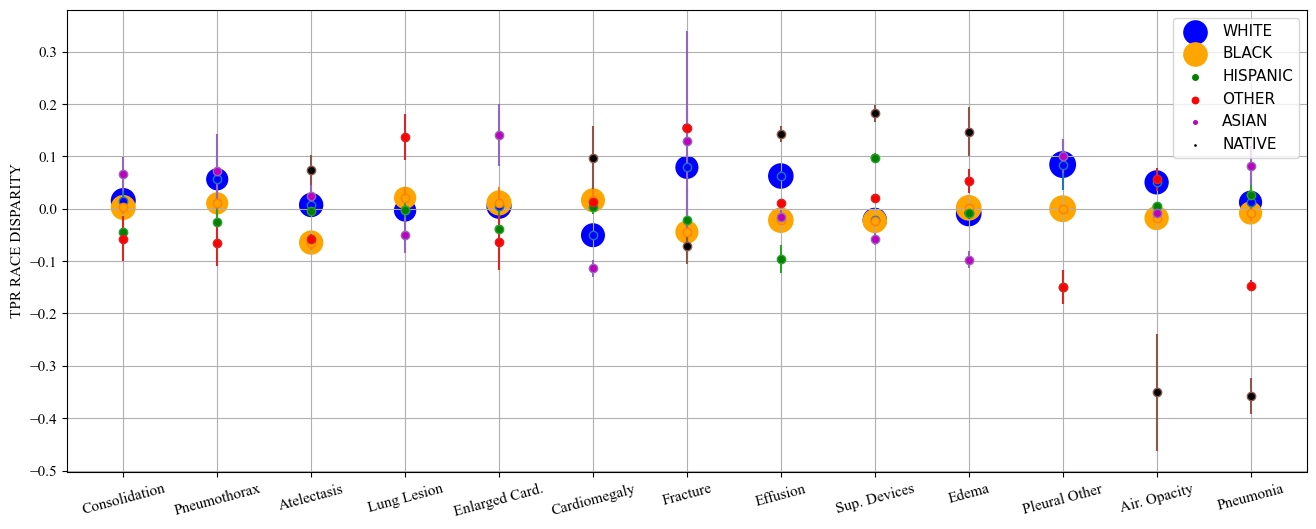

In [63]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_RACE.pdf")

## 4.  Insurance

In [64]:
insurance_dataframes = [seed_19_insurance, seed_31_insurance, seed_38_insurance,
                        seed_47_insurance,seed_77_insurance]
result_insurance_df= pd.concat(insurance_dataframes)

result_insurance_grouped =result_insurance_df.groupby("diseases")
result_insurance_grouped_stat = result_insurance_grouped.describe()

In [65]:
result_insurance_grouped_stat

%Medicare                                    \
                               count      mean           std       min   
diseases                                                                 
Atelectasis                      5.0  0.405111  0.000000e+00  0.405111   
Cardiomegaly                     5.0  0.413599  6.206335e-17  0.413599   
Consolidation                    5.0  0.376495  0.000000e+00  0.376495   
Edema                            5.0  0.477952  6.206335e-17  0.477952   
Enlarged Cardiomediastinum       5.0  0.342857  0.000000e+00  0.342857   
Fracture                         5.0  0.302381  0.000000e+00  0.302381   
Lung Lesion                      5.0  0.318267  0.000000e+00  0.318267   
Lung Opacity                     5.0  0.400491  0.000000e+00  0.400491   
No Finding                       5.0  0.225164  3.103168e-17  0.225164   
Pleural Effusion                 5.0  0.441867  0.000000e+00  0.441867   
Pleural Other                    5.0  0.424342  6.206335e-17  0.424342   
Pneumonia                        5.0  0.361388  0.000000e+00  0.361388   
Pneumothorax                     5.0  0.284232  0.000000e+00  0.284232   
Support Devices                  5.0  0.381669  0.000000e+00  0.381669   

                                                                    \
                                 25%       50%       75%       max   
diseases                                                             
Atelectasis                 0.405111  0.405111  0.405111  0.405111   
Cardiomegaly                0.413599  0.413599  0.413599  0.413599   
Consolidation               0.376495  0.376495  0.376495  0.376495   
Edema                       0.477952  0.477952  0.477952  0.477952   
Enlarged Cardiomediastinum  0.342857  0.342857  0.342857  0.342857   
Fracture                    0.302381  0.302381  0.302381  0.302381   
Lung Lesion                 0.318267  0.318267  0.318267  0.318267   
Lung Opacity                0.400491  0.400491  0.400491  0.400491   
No Finding                  0.225164  0.225164  0.225164  0.225164   
Pleural Effusion            0.441867  0.441867  0.441867  0.441867   
Pleural Other               0.424342  0.424342  0.424342  0.424342   
Pneumonia                   0.361388  0.361388  0.361388  0.361388   
Pneumothorax                0.284232  0.284232  0.284232  0.284232   
Support Devices             0.381669  0.381669  0.381669  0.381669   

                           Gap_Medicare            ... %Medicaid            \
                                  count      mean  ...       75%       max   
diseases                                           ...                       
Atelectasis                         5.0  0.034567  ...  0.058431  0.058431   
Cardiomegaly                        5.0  0.022232  ...  0.075711  0.075711   
Consolidation                       5.0 -0.014331  ...  0.092189  0.092189   
Edema                               5.0  0.005088  ...  0.077952  0.077952   
Enlarged Cardiomediastinum          5.0 -0.004383  ...  0.074074  0.074074   
Fracture                            5.0 -0.000977  ...  0.054762  0.054762   
Lung Lesion                         5.0 -0.012240  ...  0.065913  0.065913   
Lung Opacity                        5.0  0.028219  ...  0.075212  0.075212   
No Finding                          5.0 -0.131742  ...  0.080210  0.080210   
Pleural Effusion                    5.0  0.063588  ...  0.044298  0.044298   
Pleural Other                       5.0  0.151364  ...  0.069079  0.069079   
Pneumonia                           5.0 -0.043926  ...  0.062625  0.062625   
Pneumothorax                        5.0  0.095778  ...  0.042185  0.042185   
Support Devices                     5.0 -0.010838  ...  0.074776  0.074776   

                           Gap_Medicaid                                \
                                  count      mean       std       min   
diseases                                                                
Atelectasis                    

In [66]:
insurance_tpr_disp = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [67]:
insurance_df_medicare_mean = result_insurance_grouped_stat['%Medicare']['mean']
insurance_df_medicare_gap = result_insurance_grouped_stat['Gap_Medicare']["mean"]
insurance_df_medicare_ci = significance_level * result_insurance_grouped_stat['Gap_Medicare']["std"] / np.sqrt(number_of_runs)


In [68]:
insurance_df_other_mean = result_insurance_grouped_stat['%Other']['mean']
insurance_df_other_gap = result_insurance_grouped_stat['Gap_Other']["mean"]
insurance_df_other_ci = significance_level * result_insurance_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [69]:
insurance_df_medicaid_mean = result_insurance_grouped_stat['%Medicaid']['mean']
insurance_df_medicaid_gap = result_insurance_grouped_stat['Gap_Medicaid']["mean"]
insurance_df_medicaid_ci = significance_level * result_insurance_grouped_stat['Gap_Medicaid']["std"] / np.sqrt(number_of_runs)


In [70]:
percent_medicaid_list = []
ci_medicaid_list = []
gap_medicaid_mean_list = []

percent_medicare_list = []
ci_medicare_list = []
gap_medicare_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []

In [71]:
for disease in diseases:
    mean_list = []

    percent_other_list.append(insurance_df_other_mean[disease])
    gap_other_mean_list.append(insurance_df_other_gap[disease])
    ci_other_list.append(insurance_df_other_ci[disease])
    mean_list.append(insurance_df_other_ci[disease])

    percent_medicare_list.append(insurance_df_medicare_mean[disease])
    gap_medicare_mean_list.append(insurance_df_medicare_gap[disease])
    ci_medicare_list.append(insurance_df_medicare_ci[disease])
    mean_list.append(insurance_df_medicare_ci[disease])

    percent_medicaid_list.append(insurance_df_medicaid_mean[disease])
    gap_medicaid_mean_list.append(insurance_df_medicaid_gap[disease])
    ci_medicaid_list.append(insurance_df_medicaid_ci[disease])
    mean_list.append(insurance_df_medicare_ci[disease])


    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [72]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%Medicare": percent_medicare_list, 'Gap_C_mean': gap_medicare_mean_list, 'CI_C': ci_medicare_list,
     "%Other": percent_other_list, 'Gap_O_mean': gap_other_mean_list, 'CI_O': ci_other_list,
     "%Medicaid": percent_medicaid_list, 'Gap_A_mean': gap_medicaid_mean_list, 'CI_A': ci_medicaid_list
     }

In [73]:
insurance_tpr_disp_df = pd.DataFrame(d)
insurance_tpr_disp_df = insurance_tpr_disp_df.sort_values(by ='Distance' )
insurance_tpr_disp_df.to_csv("./TPR_GAPS/insurance_tpr_disp.csv")


In [74]:
insurance_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%Medicare', 'Gap_C_mean',
       'CI_C', '%Other', 'Gap_O_mean', 'CI_O', '%Medicaid', 'Gap_A_mean',
       'CI_A'],
      dtype='object')

In [75]:

# Extract just the Gap columns in the right order
gap_cols = [
    'Gap_C_mean', 'Gap_O_mean', 'Gap_A_mean']

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = insurance_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


Gap_C_mean vs Gap_O_mean: t=0.8499, p=0.4120, corrected_p=1.0000, significant=False
Gap_C_mean vs Gap_A_mean: t=2.0870, p=0.0589, corrected_p=0.1767, significant=False
Gap_O_mean vs Gap_A_mean: t=2.4439, p=0.0309, corrected_p=0.0928, significant=False


In [76]:
insurance_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%Medicare', 'Gap_C_mean',
       'CI_C', '%Other', 'Gap_O_mean', 'CI_O', '%Medicaid', 'Gap_A_mean',
       'CI_A'],
      dtype='object')

In [77]:

df = insurance_tpr_disp_df
# Define the columns to use
gap_cols = ['Gap_C_mean','Gap_O_mean','Gap_A_mean']

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_C = gap_df['Gap_C_mean'].tolist()
group_O = gap_df['Gap_O_mean'].tolist()
group_A = gap_df['Gap_A_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_C, group_O, group_A)

print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 4.985, p-value = 0.012 significant=True


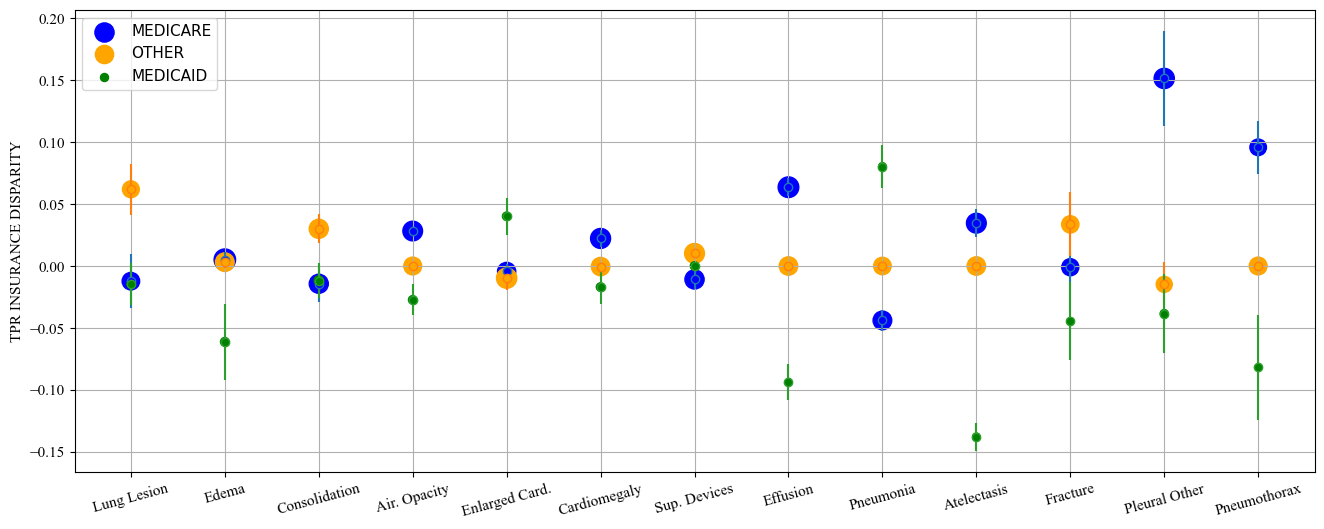

In [ ]:
plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_C_mean'],
            s= np.multiply(insurance_tpr_disp_df['%Medicare'],500), marker='o',color='blue', label="MEDICARE")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_C_mean'],
             yerr = insurance_tpr_disp_df['CI_C'],fmt='o',mfc='blue')

plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_O_mean'],
            s= np.multiply(insurance_tpr_disp_df['%Other'],500), marker='o',color='orange', label="OTHER")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_O_mean'],
             yerr = insurance_tpr_disp_df['CI_O'],fmt='o',mfc='orange')

plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_A_mean'],
            s= np.multiply(insurance_tpr_disp_df['%Medicaid'],500), marker='o',color='green', label="MEDICAID")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_A_mean'],
             yerr = insurance_tpr_disp_df['CI_A'],fmt='o',mfc='green')


plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR INSURANCE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_INSURANCE.pdf")